<a href="https://colab.research.google.com/github/Masuminayat/Chinook-SQL-Analysis/blob/main/SQL_Based_Analysis_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import sqlite3, pandas as pd
import matplotlib.pyplot as plt

# Connecting to the Chinook database
conn = sqlite3.connect("Chinook_Sqlite.sqlite")

# Show available tables
pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;", conn)


,name
0,Album
1,Artist
2,Customer
3,Employee
4,Genre
5,Invoice
6,InvoiceLine
7,MediaType
8,Playlist
9,PlaylistTrack


In [9]:
qry_top_tracks = """
SELECT
  t.Name AS track_name,
  ar.Name AS artist_name,
  SUM(il.Quantity) AS total_qty_sold,
  ROUND(SUM(il.UnitPrice * il.Quantity),2) AS total_revenue
FROM InvoiceLine il
JOIN Track t   ON il.TrackId = t.TrackId
JOIN Album a   ON t.AlbumId = a.AlbumId
JOIN Artist ar ON a.ArtistId = ar.ArtistId
GROUP BY t.Name, ar.Name
ORDER BY total_qty_sold DESC
LIMIT 10;
"""
df_top_tracks = pd.read_sql_query(qry_top_tracks, conn)
df_top_tracks


,track_name,artist_name,total_qty_sold,total_revenue
0,The Trooper,Iron Maiden,5,4.95
1,Eruption,Van Halen,4,3.96
2,Hallowed Be Thy Name,Iron Maiden,4,3.96
3,Sure Know Something,Kiss,4,3.96
4,The Number Of The Beast,Iron Maiden,4,3.96
5,2 Minutes To Midnight,Iron Maiden,3,2.97
6,Blood Brothers,Iron Maiden,3,2.97
7,Can I Play With Madness,Iron Maiden,3,2.97
8,Dazed and Confused,Led Zeppelin,3,2.97
9,Flying High Again,Ozzy Osbourne,3,2.97


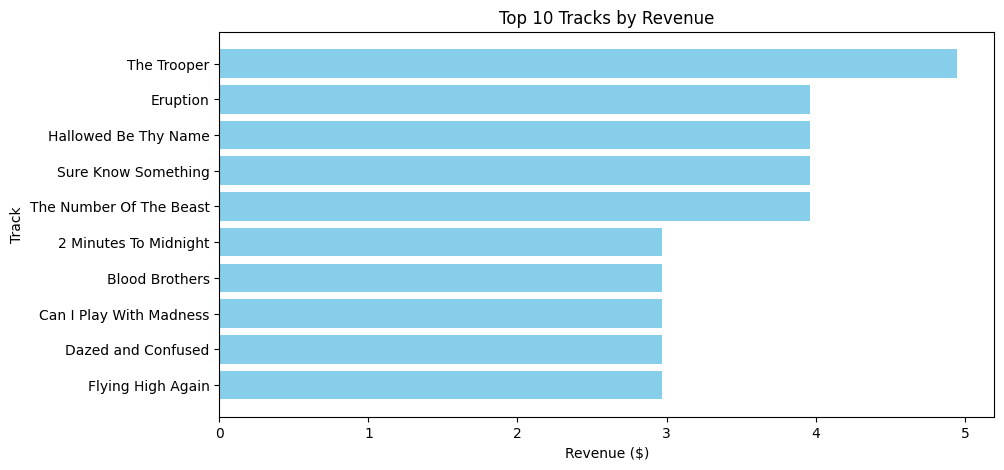

In [12]:
# 1) Top 10 tracks by revenue (bar chart)
plt.figure(figsize=(10,5))
plt.barh(df_top_tracks['track_name'], df_top_tracks['total_revenue'], color='skyblue')
plt.xlabel("Revenue ($)")
plt.ylabel("Track")
plt.title("Top 10 Tracks by Revenue")
plt.gca().invert_yaxis()  # highest on top
plt.show()


In [13]:
#Monthly Revenue Trend
qry_month = """
SELECT
  strftime('%Y-%m', InvoiceDate) AS year_month,
  COUNT(*) AS invoice_count,
  ROUND(SUM(Total),2) AS revenue
FROM Invoice
GROUP BY year_month
ORDER BY year_month;
"""
df_month = pd.read_sql_query(qry_month, conn)
df_month


,year_month,invoice_count,revenue
0,2009-01,6,35.64
1,2009-02,7,37.62
2,2009-03,7,37.62
3,2009-04,7,37.62
4,2009-05,7,37.62
5,2009-06,7,37.62
6,2009-07,7,37.62
7,2009-08,7,37.62
8,2009-09,7,37.62
9,2009-10,7,37.62


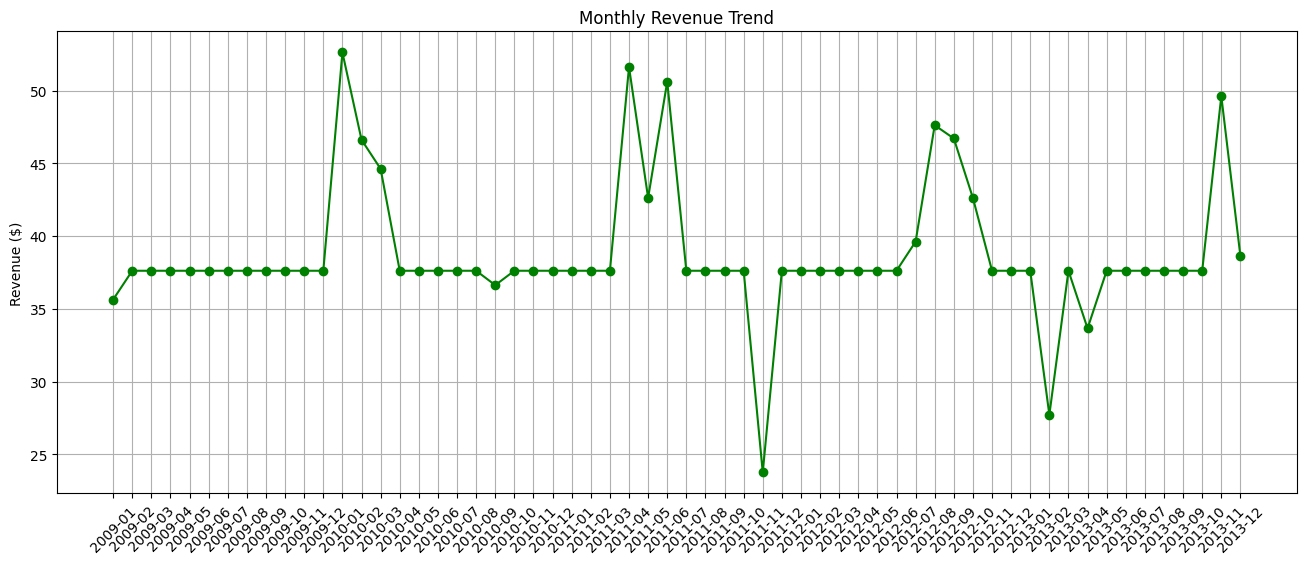

In [18]:
plt.figure(figsize=(16,6))
plt.plot(df_month['year_month'], df_month['revenue'], marker='o', color='green')
plt.xticks(rotation=45)
plt.ylabel("Revenue ($)")
plt.title("Monthly Revenue Trend")
plt.grid(True)
plt.show()


In [19]:
#Revenue per country
qry_region = """
SELECT
  i.BillingCountry AS country,
  ROUND(SUM(i.Total),2) AS revenue
FROM Invoice i
GROUP BY i.BillingCountry
ORDER BY revenue DESC;
"""
df_region = pd.read_sql_query(qry_region, conn)
df_region


,country,revenue
0,USA,523.06
1,Canada,303.96
2,France,195.10
3,Brazil,190.10
4,Germany,156.48
5,United Kingdom,112.86
6,Czech Republic,90.24
7,Portugal,77.24
8,India,75.26
9,Chile,46.62


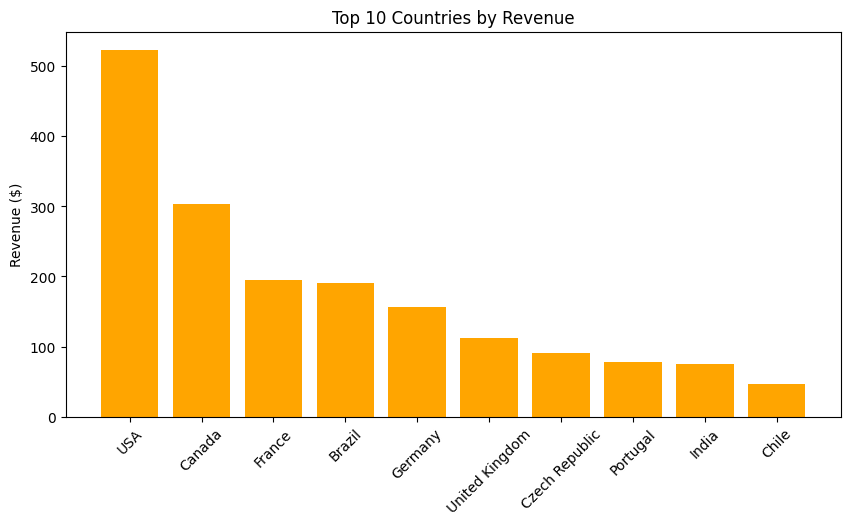

In [20]:
df_region_top10 = df_region.head(10)

plt.figure(figsize=(10,5))
plt.bar(df_region_top10['country'], df_region_top10['revenue'], color='orange')
plt.xticks(rotation=45)
plt.ylabel("Revenue ($)")
plt.title("Top 10 Countries by Revenue")
plt.show()


In [21]:
qry_genre = """
WITH track_sales AS (
  SELECT
    g.Name AS genre_name,
    t.Name AS track_name,
    ar.Name AS artist_name,
    SUM(il.Quantity) AS total_qty
  FROM InvoiceLine il
  JOIN Track t   ON il.TrackId = t.TrackId
  JOIN Genre g   ON t.GenreId = g.GenreId
  JOIN Album a   ON t.AlbumId = a.AlbumId
  JOIN Artist ar ON a.ArtistId = ar.ArtistId
  GROUP BY g.Name, t.Name, ar.Name
)
SELECT genre_name, track_name, artist_name, total_qty
FROM (
  SELECT *,
         ROW_NUMBER() OVER (PARTITION BY genre_name ORDER BY total_qty DESC) AS rank
  FROM track_sales
)
WHERE rank <= 3
ORDER BY genre_name, rank;
"""
df_top_genre_tracks = pd.read_sql_query(qry_genre, conn)
df_top_genre_tracks


,genre_name,track_name,artist_name,total_qty
0,Alternative,All Night Thing,Temple of the Dog,1
1,Alternative,Billie Jean,Chris Cornell,1
2,Alternative,Call Me a Dog,Temple of the Dog,1
3,Alternative & Punk,Release,The Tea Party,3
4,Alternative & Punk,A Melhor Forma,Titãs,2
...,...,...,...,...
67,TV Shows,Hot Girl,The Office,2
68,TV Shows,Pilot,Aquaman,2
69,World,A Moça e a Chuva,Mônica Marianno,1
70,World,Aos Leões,Mônica Marianno,1


In [24]:
df_top_tracks.to_csv("top_tracks.csv", index=False)
df_region.to_csv("revenue_by_country.csv", index=False)
df_month.to_csv("monthly_revenue.csv", index=False)
df_top_genre_tracks.to_csv("top_genre_tracks.csv", index=False)
